In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
import seaborn as sns

In [2]:
df = pd.read_csv('D:/data/Credit_Risk/credit_risk_dataset.csv')

In [3]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


### Dropping null values

In [5]:
df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [6]:
df = df.dropna()

In [7]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,28638.000000,2.863800e+04,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000
mean,27.727216,6.664937e+04,4.788672,9656.493121,11.039867,0.216600,0.169488,5.793736
std,6.310441,6.235645e+04,4.154627,6329.683361,3.229372,0.411935,0.106393,4.038483
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.948000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.595600e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


### Encoding

In [8]:
df['loan_grade'] = df['loan_grade'].replace({'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7})
df['cb_person_default_on_file'] = df['cb_person_default_on_file'].replace({'N':0,'Y':1})

C:\Users\hp\AppData\Local\Temp\ipykernel_2532\2076174231.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['loan_grade'] = df['loan_grade'].replace({'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7})
C:\Users\hp\AppData\Local\Temp\ipykernel_2532\2076174231.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['cb_person_default_on_file'] = df['cb_person_default_on_file'].replace({'N':0,'Y':1})


In [9]:
ohe = preprocessing.OneHotEncoder(sparse_output=False).set_output(transform='pandas')
encoded = ohe.fit_transform(df[['person_home_ownership','loan_intent']])
df = df.join(encoded).drop(['person_home_ownership','loan_intent'],axis=1)

### Feature Engineering

In [10]:
df['debt_to_income_ratio'] = df['loan_amnt'] / df['person_income']
df['remaining_income'] = df['person_income'] - df['loan_amnt']

In [11]:
df.corr()['loan_status'].sort_values(ascending=False)

loan_status                       1.000000
debt_to_income_ratio              0.386305
loan_percent_income               0.379689
loan_grade                        0.379683
loan_int_rate                     0.339350
person_home_ownership_RENT        0.236239
cb_person_default_on_file         0.182019
loan_amnt                         0.113550
loan_intent_DEBTCONSOLIDATION     0.071145
loan_intent_MEDICAL               0.059955
loan_intent_HOMEIMPROVEMENT       0.034534
person_home_ownership_OTHER       0.009840
cb_person_cred_hist_length       -0.015649
loan_intent_PERSONAL             -0.021054
person_age                       -0.023333
loan_intent_EDUCATION            -0.056138
loan_intent_VENTURE              -0.078644
person_emp_length                -0.082638
person_home_ownership_OWN        -0.104832
person_income                    -0.139938
remaining_income                 -0.154885
person_home_ownership_MORTGAGE   -0.184466
Name: loan_status, dtype: float64

### Dropping the outliers

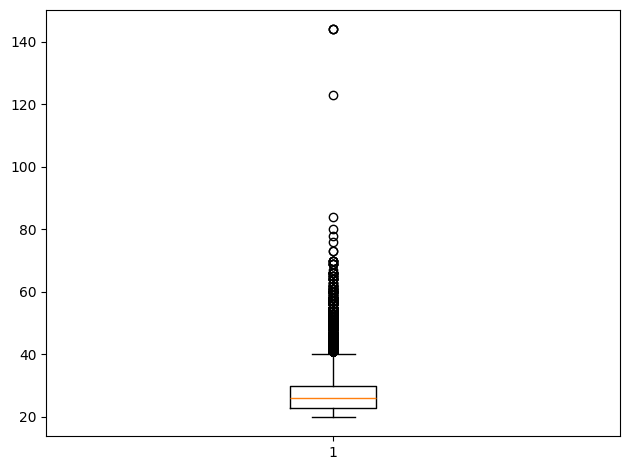

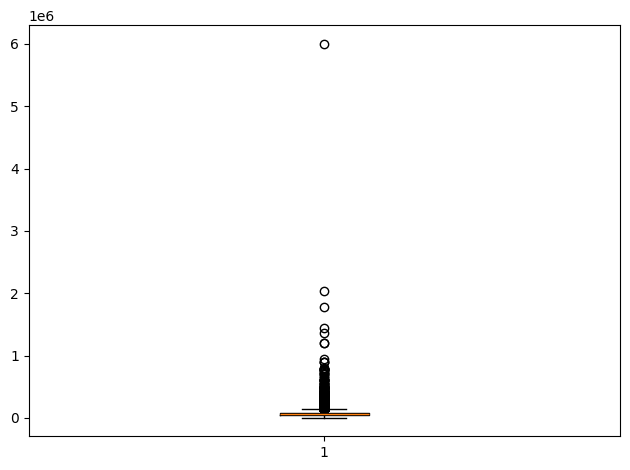

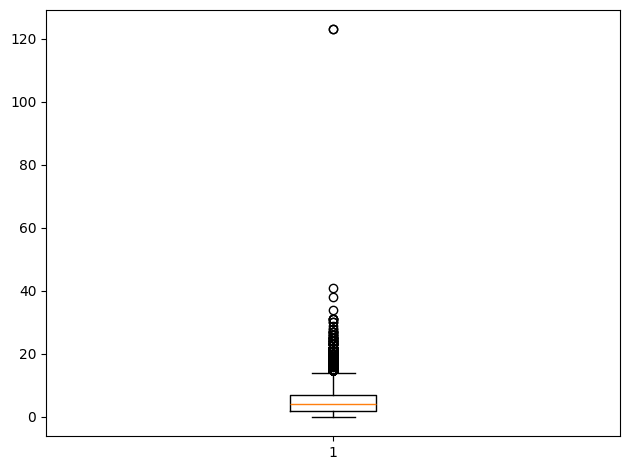

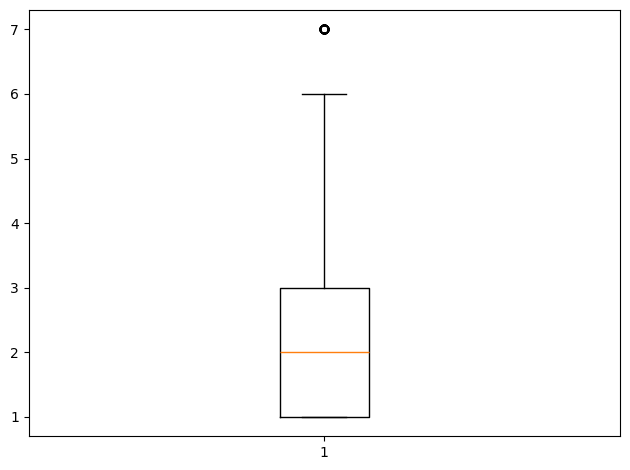

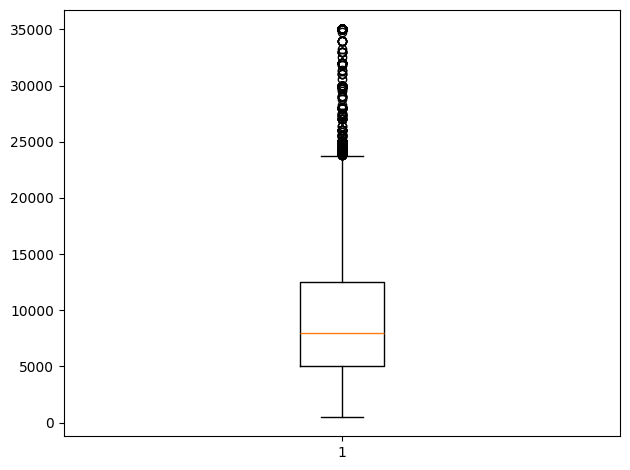

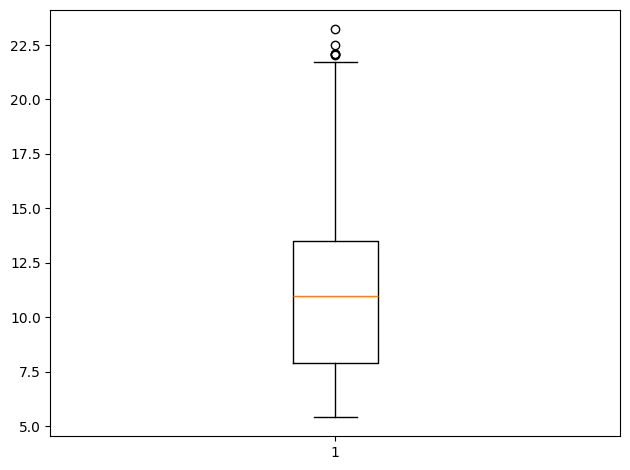

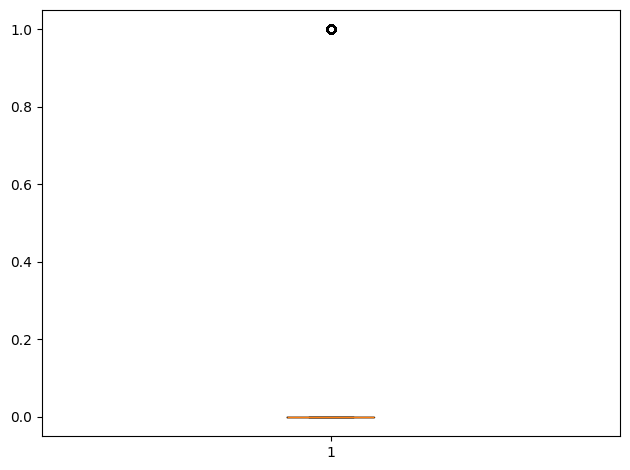

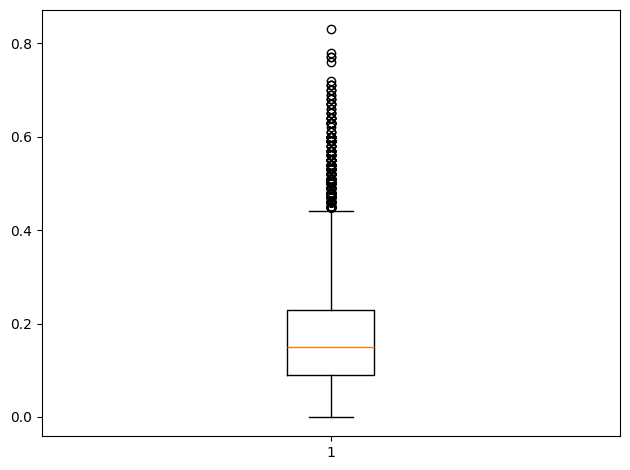

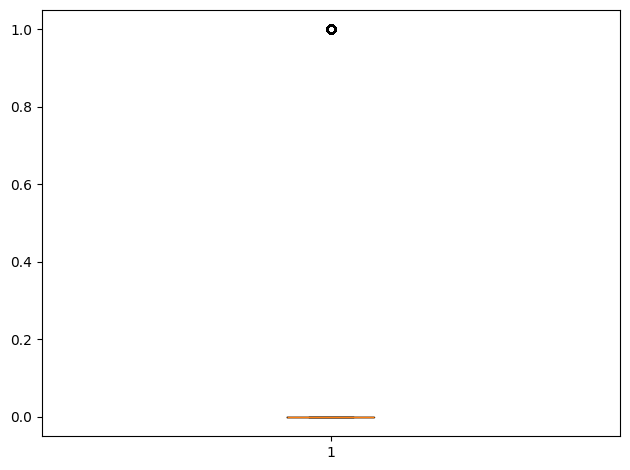

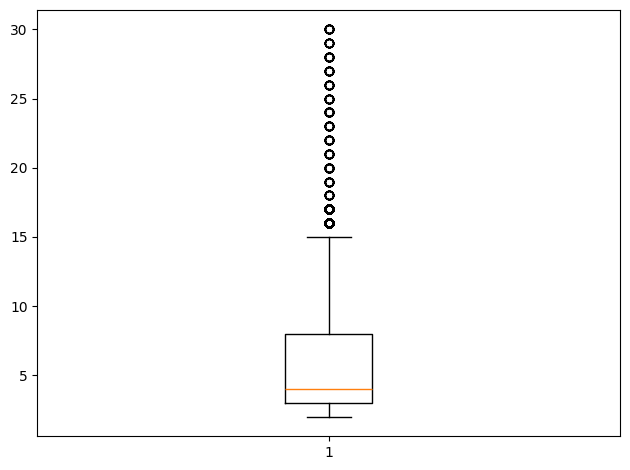

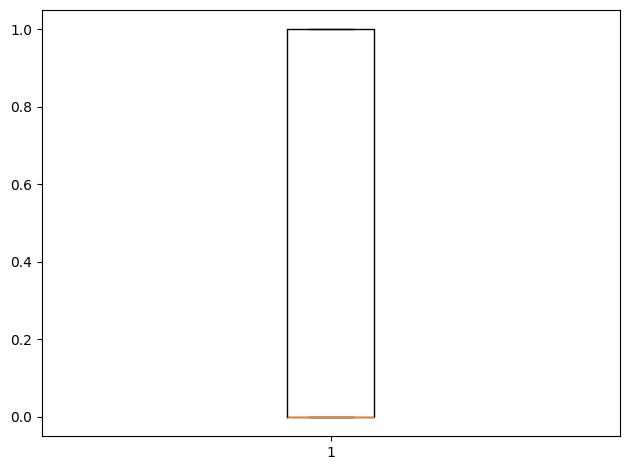

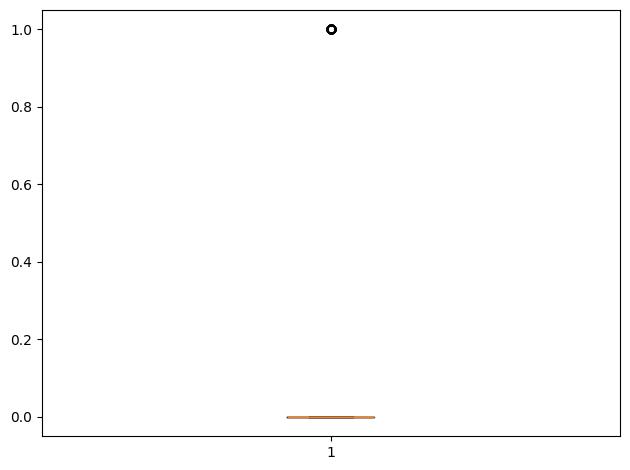

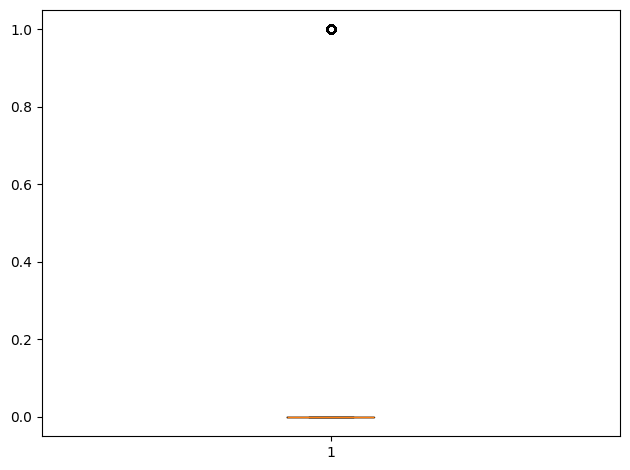

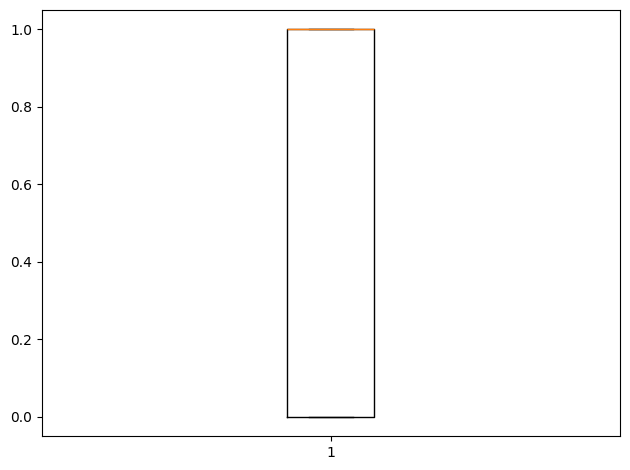

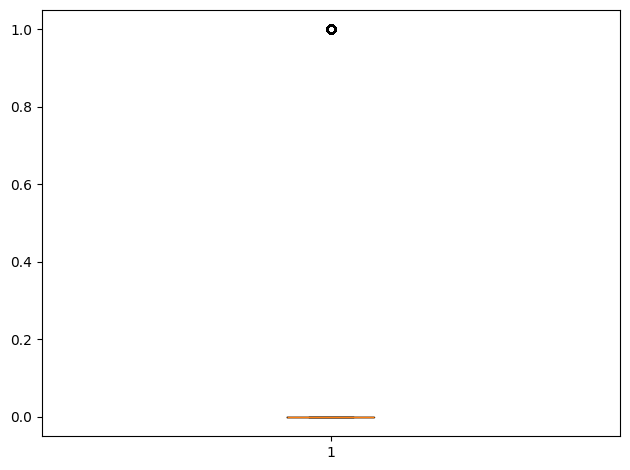

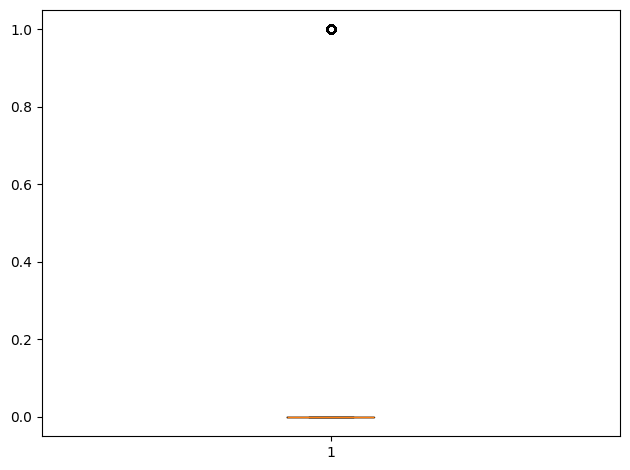

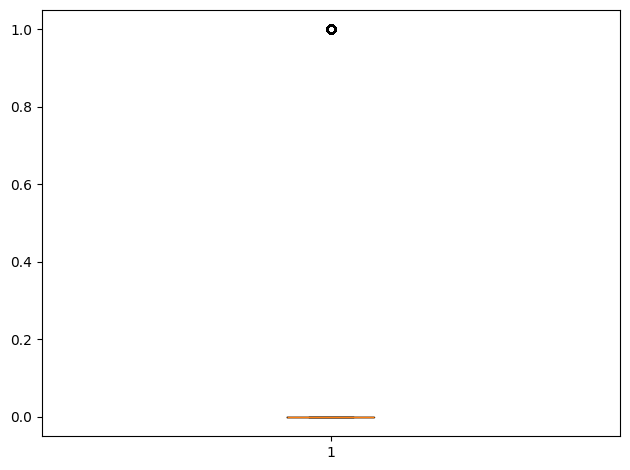

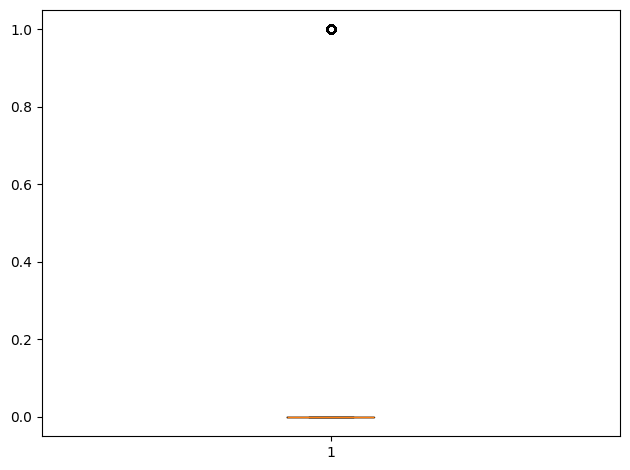

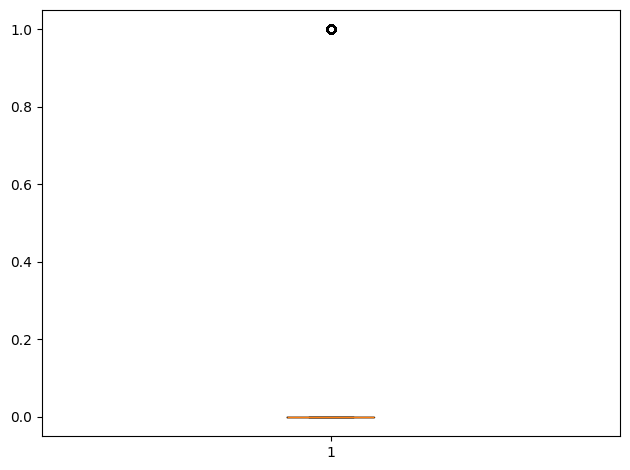

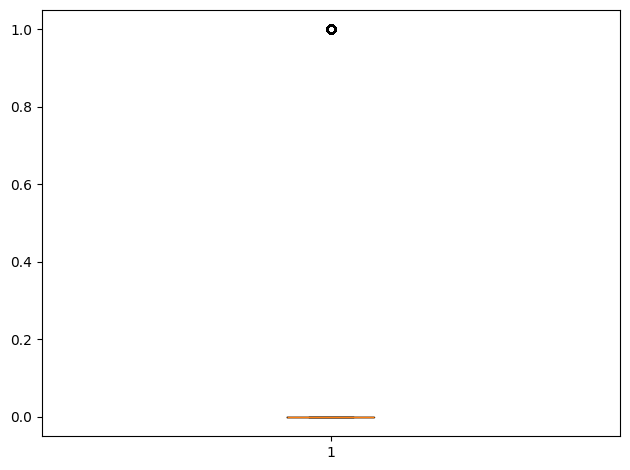

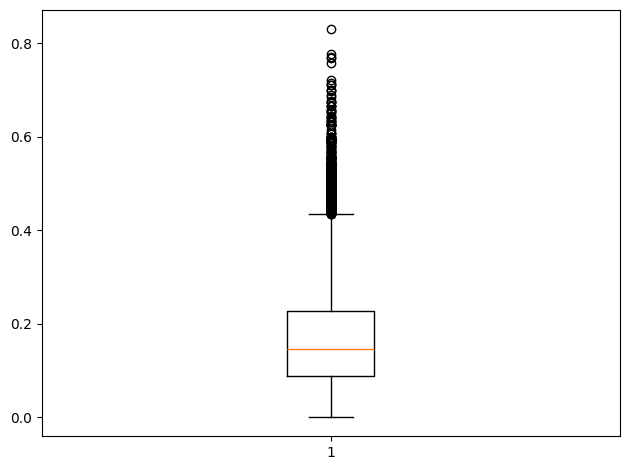

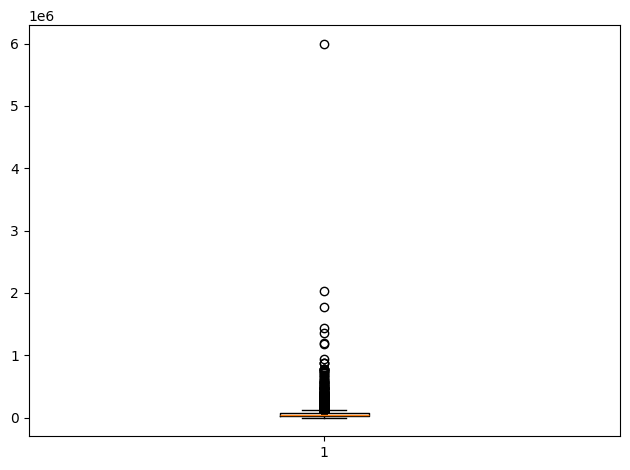

In [12]:
for col in df.columns:
    plt.boxplot(df[col])
    plt.tight_layout()
    plt.show()

In [14]:
# Identify continuous and binary columns
continuous_cols = [col for col in df.columns if df[col].nunique() > 2]  # Columns with more than 2 unique values
binary_cols = [col for col in df.columns if df[col].nunique() == 2]     # Binary columns

# Remove outliers only from continuous columns
for col in continuous_cols:
    Q1 = df[col].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df[col].quantile(0.75)  # Third quartile (75th percentile)
    
    IQR = Q3 - Q1  # Interquartile range
    
    upper_whisker = Q3 + 1.5 * IQR  # Upper bound for outliers
    lower_whisker = Q1 - 1.5 * IQR  # Lower bound for outliers
    
    # Filter out outliers
    df = df[(df[col] <= upper_whisker) & (df[col] >= lower_whisker)]

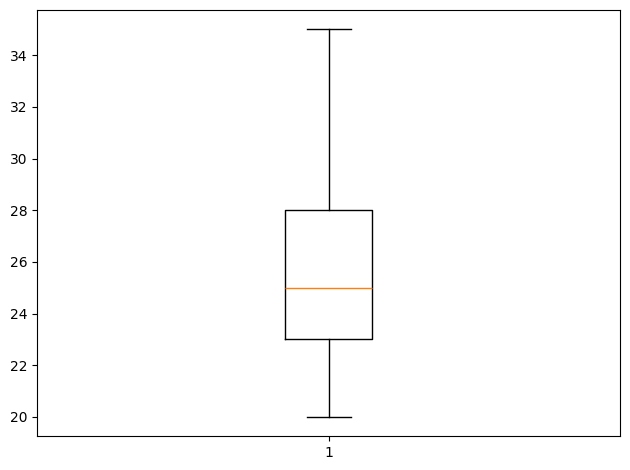

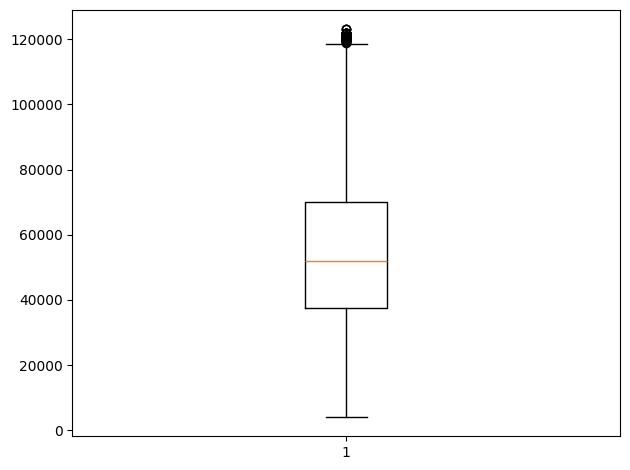

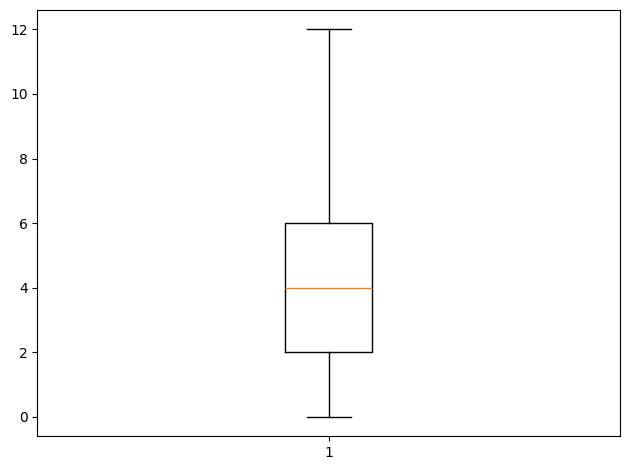

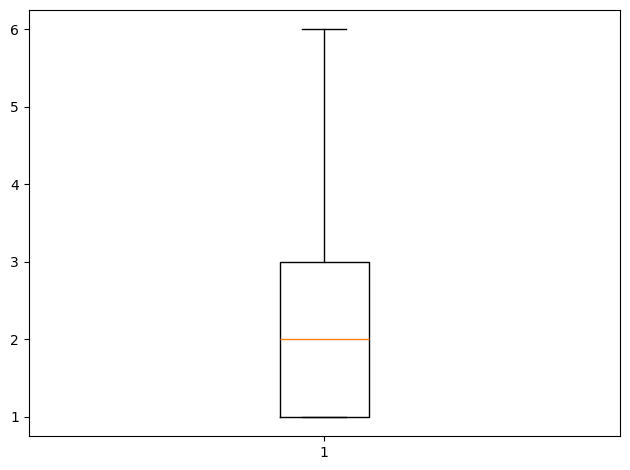

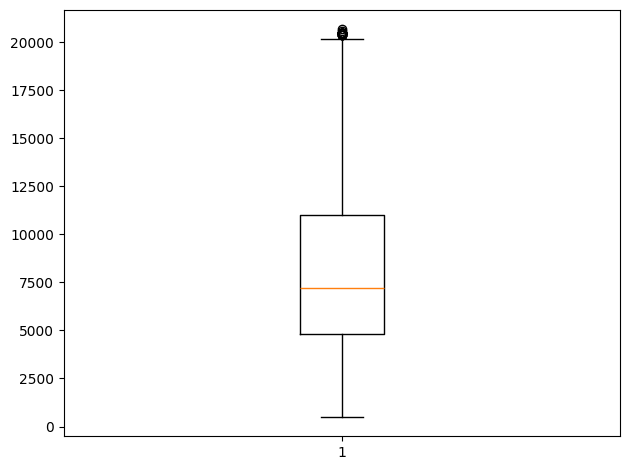

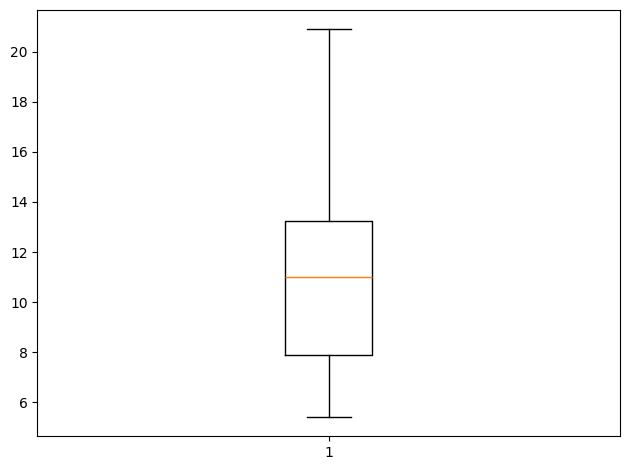

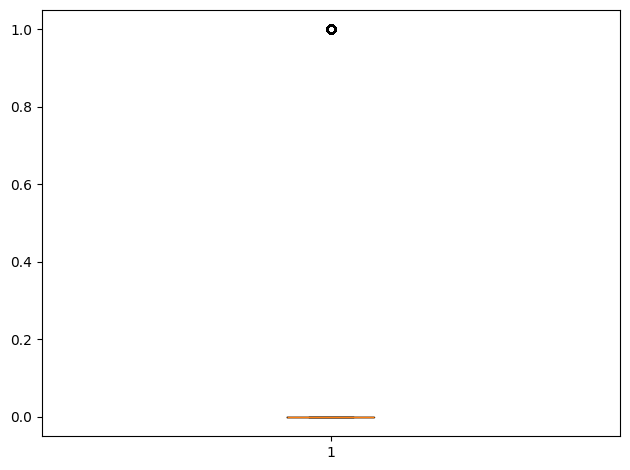

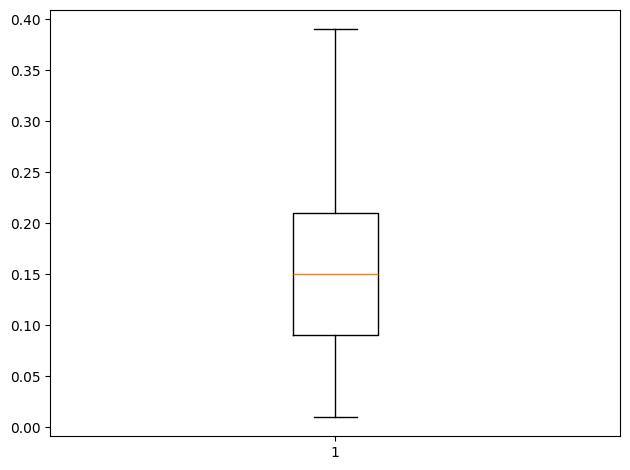

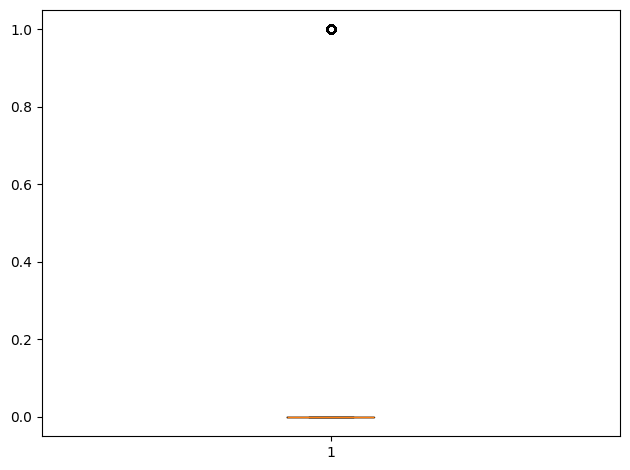

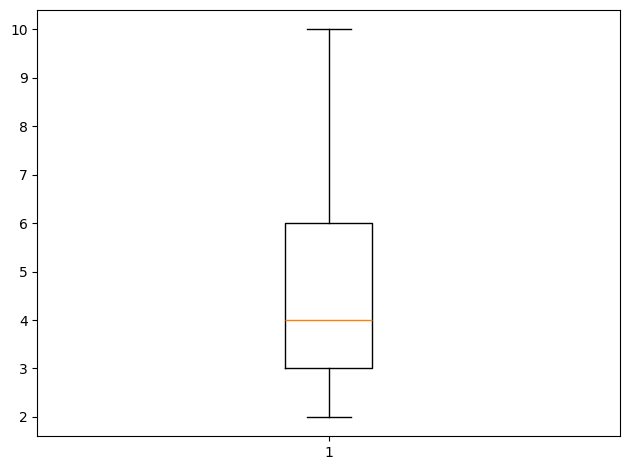

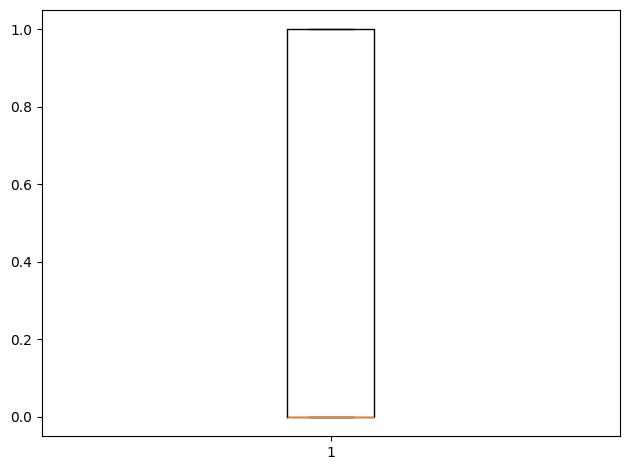

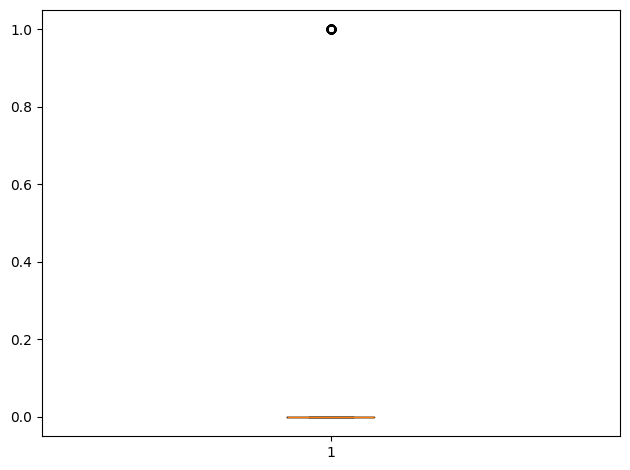

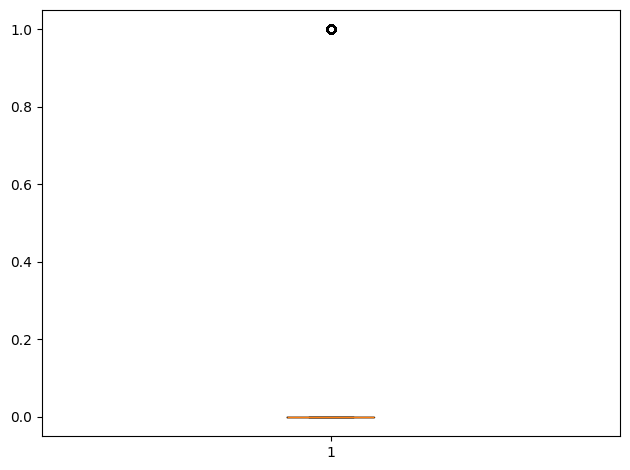

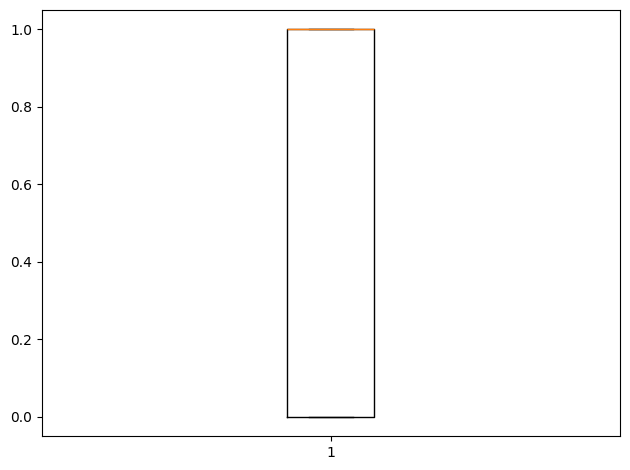

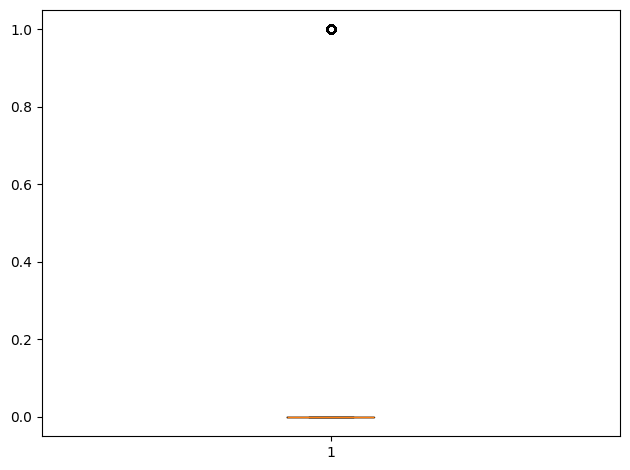

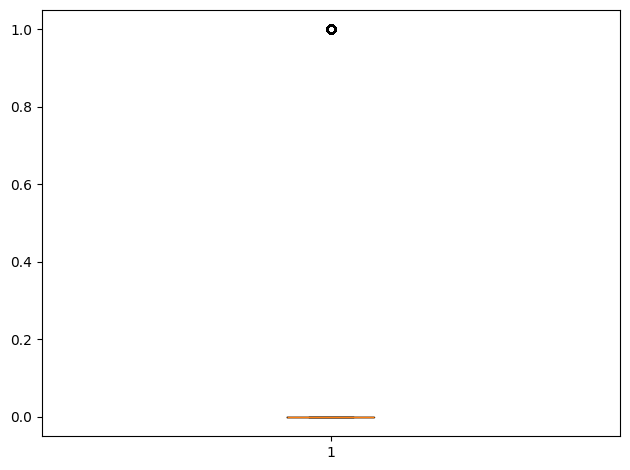

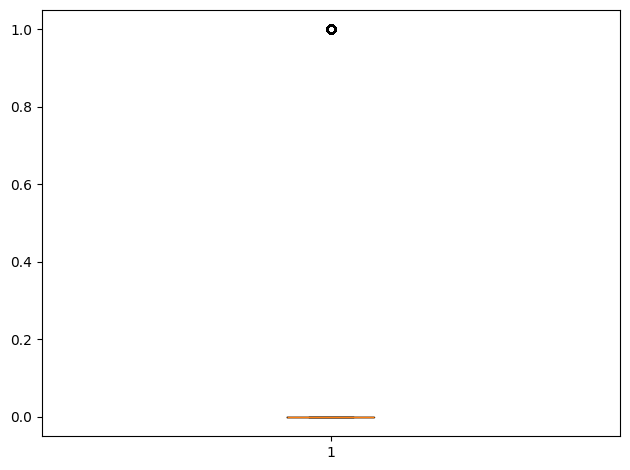

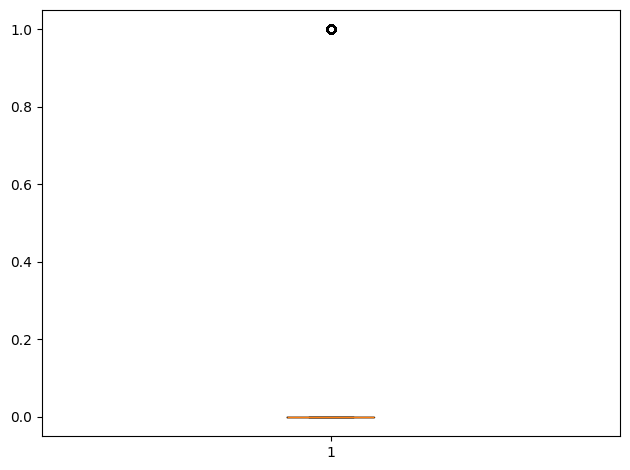

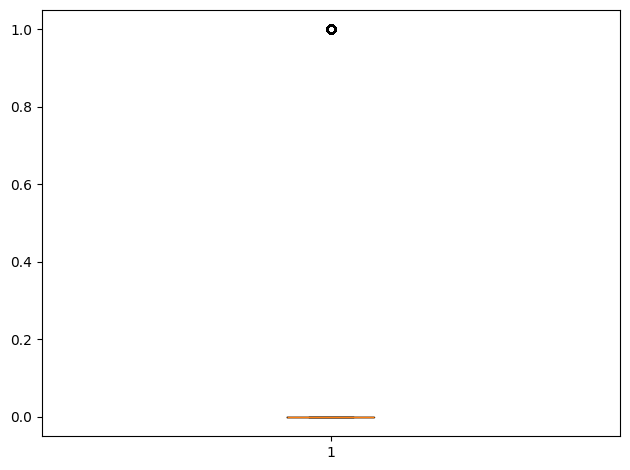

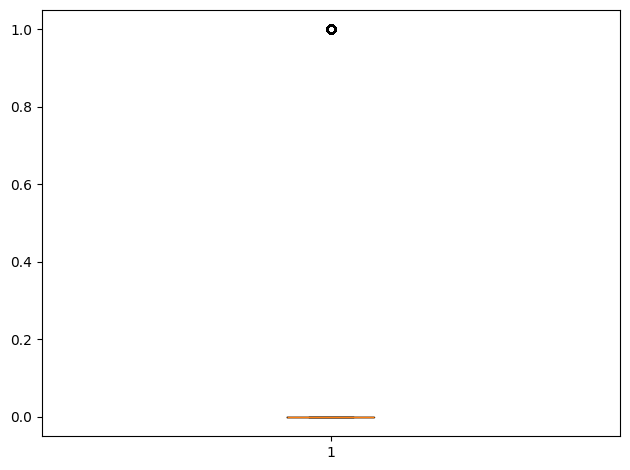

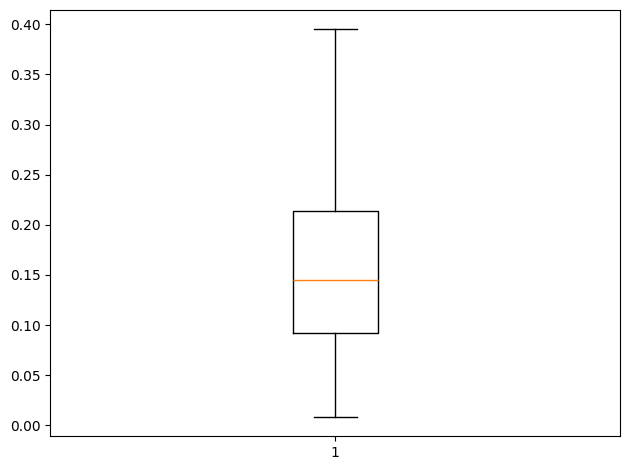

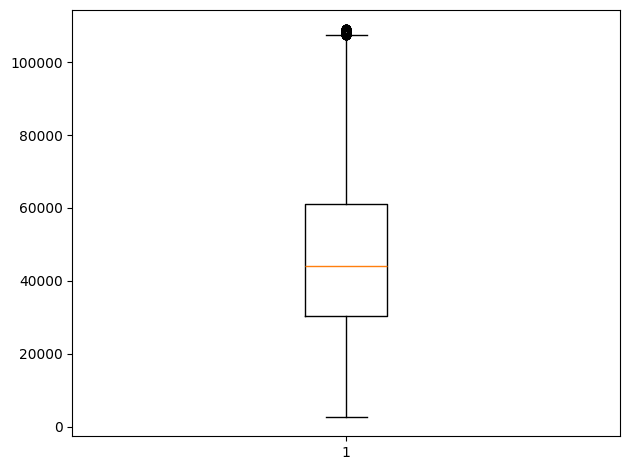

In [15]:
for col in df.columns:
    plt.boxplot(df[col])
    plt.tight_layout()
    plt.show()

In [16]:
df.corr()['loan_status'].sort_values(ascending=False)

loan_status                       1.000000
loan_grade                        0.378519
loan_int_rate                     0.337123
debt_to_income_ratio              0.302462
loan_percent_income               0.295699
person_home_ownership_RENT        0.196682
cb_person_default_on_file         0.184941
loan_intent_HOMEIMPROVEMENT       0.064589
loan_intent_DEBTCONSOLIDATION     0.061447
loan_intent_MEDICAL               0.054412
loan_amnt                         0.046370
person_home_ownership_OTHER       0.006050
loan_intent_PERSONAL             -0.012011
cb_person_cred_hist_length       -0.015816
person_age                       -0.023685
loan_intent_EDUCATION            -0.070437
loan_intent_VENTURE              -0.079472
person_emp_length                -0.084145
person_home_ownership_OWN        -0.096520
person_home_ownership_MORTGAGE   -0.150459
person_income                    -0.253068
remaining_income                 -0.279529
Name: loan_status, dtype: float64

### Feature Selection

In [17]:
# Set a threshold value to filter significant correlations
threshold = 0.1

# Calculate the correlation of all features with respect to the 'loan_status' column
correlation = df.corr()['loan_status']

# Create a filter to keep features with a correlation greater than or equal to the threshold, or less than or equal to the negative threshold
filt = (correlation >= threshold) | (correlation <= -threshold)

# Get the names of features that pass the filter (i.e., those with a significant correlation with 'loan_status')
remaining_features = correlation[filt].index

# Create a new DataFrame containing only the selected features
df_filtered = df[remaining_features]

In [18]:
df_filtered.corr()['loan_status'].sort_values(ascending=False)

loan_status                       1.000000
loan_grade                        0.378519
loan_int_rate                     0.337123
debt_to_income_ratio              0.302462
loan_percent_income               0.295699
person_home_ownership_RENT        0.196682
cb_person_default_on_file         0.184941
person_home_ownership_MORTGAGE   -0.150459
person_income                    -0.253068
remaining_income                 -0.279529
Name: loan_status, dtype: float64

In [19]:
df_filtered['loan_status'].value_counts()

loan_status
0    16759
1     4175
Name: count, dtype: int64

In [20]:
df_filtered.head()

,person_income,loan_grade,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,person_home_ownership_MORTGAGE,person_home_ownership_RENT,debt_to_income_ratio,remaining_income
1,9600,2,11.14,0,0.10,0,0.0,0.0,0.104167,8600
5,9900,1,7.14,1,0.25,0,0.0,0.0,0.252525,7400
9,10000,4,14.74,1,0.16,0,0.0,0.0,0.160000,8400
19,10800,2,10.99,1,0.16,0,1.0,0.0,0.162037,9050
23,10980,1,7.29,0,0.14,0,0.0,0.0,0.136612,9480


### Creating model

In [21]:
X = df_filtered.drop('loan_status',axis=1)
y = df_filtered['loan_status']

In [22]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,train_size=0.8,random_state=42)

In [23]:
smote = SMOTE(random_state=42)
X_resampled,y_resampled = smote.fit_resample(Xtrain,ytrain)

In [24]:
std = preprocessing.StandardScaler()
Xtrain_scaled = std.fit_transform(X_resampled)
Xtest_scaled = std.transform(Xtest)

In [25]:
model = RandomForestClassifier(random_state=42)
model.fit(Xtrain_scaled,y_resampled)

RandomForestClassifier(random_state=42)

### Confusion matrix

<Axes: >

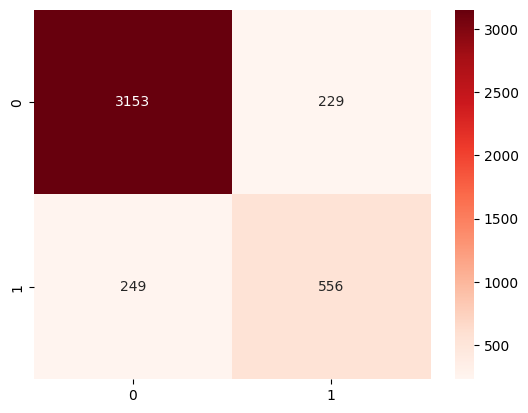

In [26]:
pred = model.predict(Xtest_scaled)

cm = metrics.confusion_matrix(ytest, pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds")

In [27]:
print(metrics.classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      3382
           1       0.71      0.69      0.70       805

    accuracy                           0.89      4187
   macro avg       0.82      0.81      0.81      4187
weighted avg       0.88      0.89      0.89      4187



### ROC Curve

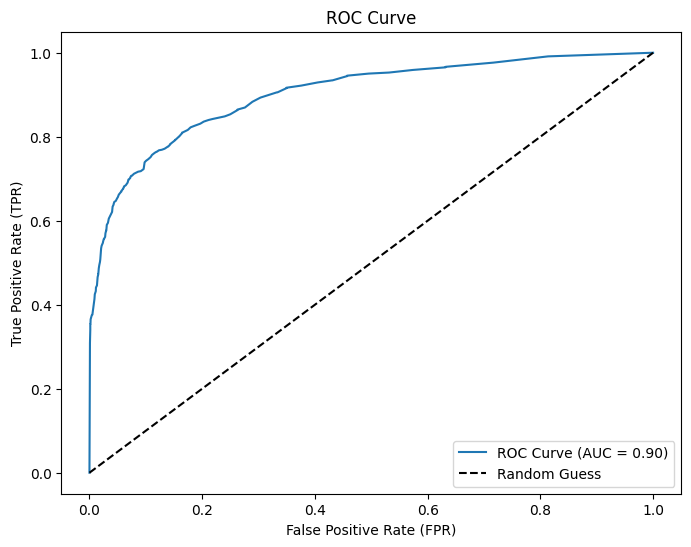

In [28]:
# Predict probabilities for the positive class
y_pred_proba = model.predict_proba(Xtest_scaled)[:, 1]  # Probability of the positive class

# Calculate TPR and FPR
fpr, tpr, thresholds = metrics.roc_curve(ytest, y_pred_proba)

# Calculate AUC
auc = metrics.roc_auc_score(ytest, y_pred_proba)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

In [29]:
scoring = cross_val_score(model,Xtrain_scaled,y_resampled,cv=10,scoring='f1')
scored = -scoring
print(f'cross_val_score:{scored}')
print(f'mean cross_val_score:{np.mean(scored)}')

cross_val_score:[-0.81395349 -0.82838284 -0.87943816 -0.94269871 -0.93722304 -0.94277329
 -0.94165738 -0.933039   -0.93636025 -0.93965198]
mean cross_val_score:-0.9095178137726215
